<a href="https://colab.research.google.com/github/Rahulchauhan1612/Zomato-Restaurant-Clustering-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

ZOMATO IMAGE.avif

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zomato_df = pd.read_csv("/content/drive/MyDrive/4. Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv")

In [ ]:
zomato_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
zomato_df.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

In [ ]:
zomato_df.shape

(105, 6)

In [ ]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
zomato_df.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

### **#Dropping links, name and timing column :**


In [ ]:
#dropping unneccesary column:

zomato_df = zomato_df.drop(['Name','Links', 'Timings'],axis = 1)
zomato_df.head()

Cost                                        Collections  \
0    800  Food Hygiene Rated Restaurants in Hyderabad, C...   
1    800                                Hyderabad's Hottest   
2  1,300                 Great Buffets, Hyderabad's Hottest   
3    800                             Late Night Restaurants   
4  1,200  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

### **#Dropping Duplicates:**

In [ ]:
#dropping duplicates:

zomato_df.drop_duplicates(inplace = True)
zomato_df.shape

(103, 3)

In [ ]:
zomato_df.describe()

Cost                                  Collections  \
count   103                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     12                                            4   

                     Cuisines  
count                     103  
unique                     92  
top     North Indian, Chinese  
freq                        3

### **#Handling cost column:**

In [ ]:
zomato_df["Cost"].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
#creating function named handlecost:

def handlecost(value):
  value = str(value)
  if ',' in value:
      value = value.replace(',', '')
      return float(value)
  else:
      return float(value)
    
zomato_df['Cost'] = zomato_df['Cost'].apply(handlecost)
zomato_df['Cost'].unique()

array([ 800., 1300., 1200., 1500.,  500.,  300., 1000.,  350.,  400.,
       1600.,  750.,  550., 1900.,  450.,  150., 1400., 1100.,  600.,
        200.,  900.,  700., 1700., 2500.,  850.,  650., 1800., 2800.,
       1750.,  250.])

### **#Handeling nan values in collection column:**

In [ ]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cost         103 non-null    float64
 1   Collections  51 non-null     object 
 2   Cuisines     103 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
# replacing nan values:

zomato_df['Collections'] = zomato_df['Collections'].replace(np.nan , "Unknown", regex=True)

In [ ]:
zomato_df.tail()

Cost           Collections                         Cuisines
99   1000.0               Unknown                 Chinese, Seafood
100   600.0               Unknown                 Fast Food, Salad
101   200.0               Unknown                   Bakery, Mithai
103   250.0               Unknown                        Fast Food
104  1700.0  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian

In [ ]:
#droppig na if any:

zomato_df = zomato_df.dropna(how = 'any')

In [ ]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 104
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cost         103 non-null    float64
 1   Collections  103 non-null    object 
 2   Cuisines     103 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.2+ KB


### **#Imputing log10 on cost column:**

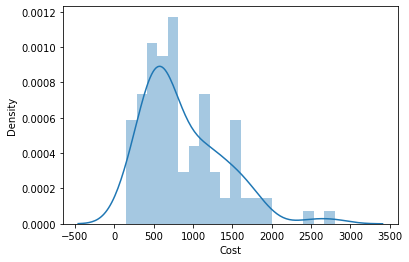

In [ ]:
sns.distplot(zomato_df['Cost'],bins=20)

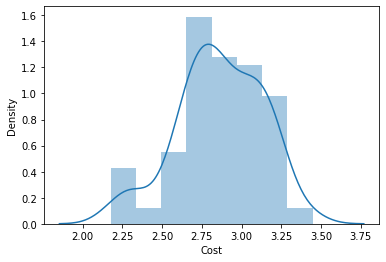

In [ ]:
#Imputing log10 on cost column:

sns.distplot(np.log10(zomato_df['Cost']))

### **#Checking and imputing outliers:**

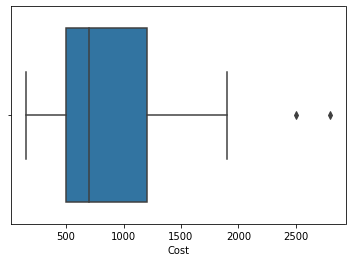

In [ ]:
sns.boxplot(zomato_df['Cost'])

In [ ]:
#imputing outliers using iqr:

def remove_outlier_using_IQR(zomato_df):
    Q1=zomato_df.quantile(0.25)
    Q3=zomato_df.quantile(0.75)
    IQR=Q3-Q1
    zomato_df_final_output = zomato_df[~((zomato_df<(Q1-1.5*IQR)) | (zomato_df>(Q3+1.5*IQR)))]
    return zomato_df_final_output

In [ ]:
zomato_df["Cost"] = remove_outlier_using_IQR(zomato_df["Cost"])

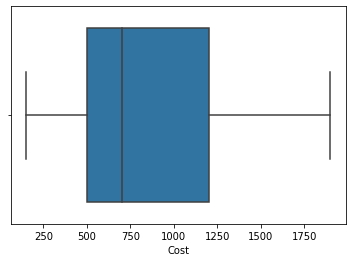

In [ ]:
sns.boxplot(zomato_df['Cost'])

### **#Top 5 Cuisines:**

In [ ]:
#Top 5 Cuisines:

Cuisines_df = zomato_df['Cuisines'].value_counts().reset_index()
Cuisines_df.head()

index  Cuisines
0                North Indian, Chinese         3
1                         North Indian         3
2                            Fast Food         2
3       Biryani, North Indian, Chinese         2
4  South Indian, North Indian, Chinese         2

In [ ]:
Cuisines_df.rename(columns={'index': 'Cuisines_name'}, inplace=True)
Cuisines_df.rename(columns={'Cuisines': 'Count'}, inplace=True)
Cuisines_df.head()

Cuisines_name  Count
0                North Indian, Chinese      3
1                         North Indian      3
2                            Fast Food      2
3       Biryani, North Indian, Chinese      2
4  South Indian, North Indian, Chinese      2

In [ ]:
Cuisines_df.tail()

Cuisines_name  Count
87  Biryani, South Indian, North Indian, Chinese, ...      1
88         Italian, North Indian, South Indian, Asian      1
89                            North Indian, Fast Food      1
90                     Arabian, North Indian, Chinese      1
91                    Thai, Asian, Chinese, Malaysian      1

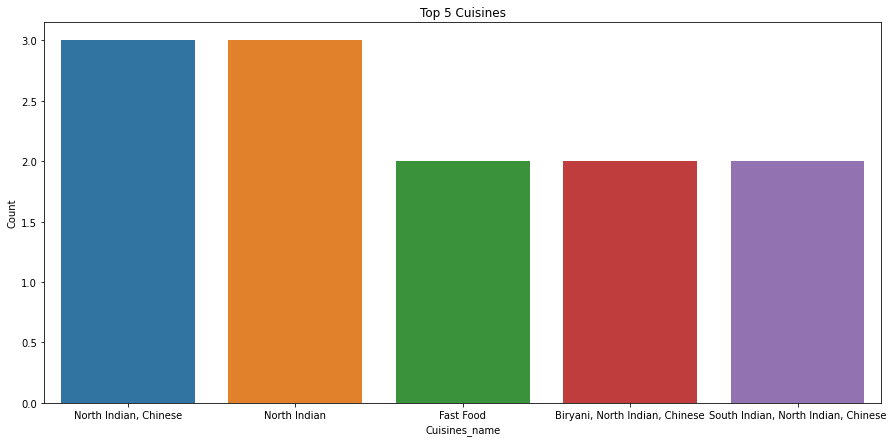

In [ ]:
#Top 5 cuisines barplot, Count Vs Cuisins name:
plt.figure(figsize=(15,7))
plt.title('Top 5 Cuisines')
sns.barplot(x='Cuisines_name',y='Count',data=Cuisines_df[:5])

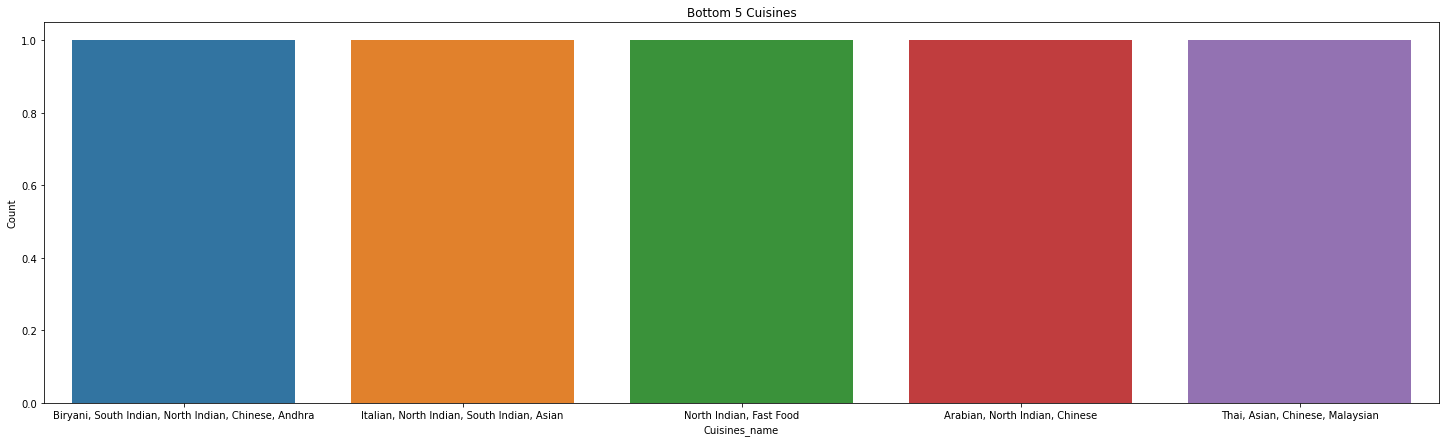

In [ ]:
#Bottom 5 cuisines barplot, Count Vs Cuisins name:
plt.figure(figsize=(25,7))
plt.title('Bottom 5 Cuisines')
sns.barplot(x='Cuisines_name',y='Count',data=Cuisines_df[-5:])

### **#Top 5 Collections:**

In [ ]:
zomato_df['Collections'] = zomato_df['Collections'].str.replace('\d+', '')

In [ ]:
#Top 5 Collections:
Collections_df = zomato_df['Collections'].value_counts().reset_index()
Collections_df.rename(columns={'index': 'Collections_name'}, inplace=True)
Collections_df.rename(columns={'Collections': 'Count'}, inplace=True)
Collections_df.head()

Collections_name  Count
0                                      Unknown     52
1  Food Hygiene Rated Restaurants in Hyderabad      4
2                                Great Buffets      2
3                                  New on Gold      2
4                          Hyderabad's Hottest      2

In [ ]:
Collections_df.tail()

Collections_name  Count
38            Live Sports Screenings, Gigs and Events      1
39  Rooftops, Live Sports Screenings, Best Bars & ...      1
40           Barbecue & Grill, Live Sports Screenings      1
41    Mandi, Great Buffets, The ‘Must Visit’ Eateries      1
42                                    Sunday Brunches      1

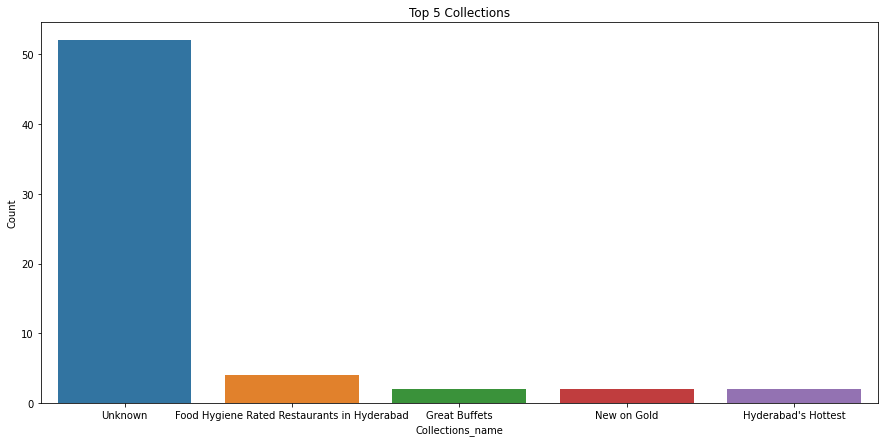

In [ ]:
#Top 5 Collections barplot, Count Vs Collections name:
plt.figure(figsize=(15,7))
plt.title('Top 5 Collections')
sns.barplot(x='Collections_name',y='Count',data=Collections_df[:5])

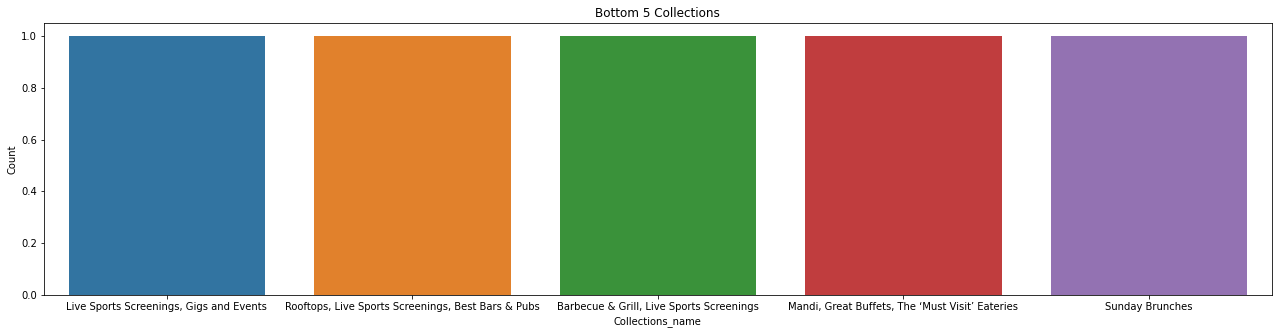

In [ ]:
#Bottom 5 Collections barplot, Count Vs Collections name:
plt.figure(figsize=(22,5))
plt.title('Bottom 5 Collections')
sns.barplot(x='Collections_name',y='Count',data=Collections_df[-5:])

In [ ]:
zomato_df[zomato_df['Collections']=='Food Hygiene Rated Restaurants in Hyderabad']

Cost                                  Collections  \
6    500.0  Food Hygiene Rated Restaurants in Hyderabad   
67  1200.0  Food Hygiene Rated Restaurants in Hyderabad   
87   600.0  Food Hygiene Rated Restaurants in Hyderabad   
96   600.0  Food Hygiene Rated Restaurants in Hyderabad   

                                             Cuisines  
6   Healthy Food, North Indian, Continental, South...  
67                           North Indian, Hyderabadi  
87                 American, Fast Food, Salad, Burger  
96                       Hyderabadi, Chinese, Mughlai

In [ ]:
Collections_df.iloc[0]

Collections_name    Unknown
Count                    52
Name: 0, dtype: object

### **#Data preprocessing:**

In [ ]:
from sklearn import preprocessing 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

### **#Removing punctuation:**

In [ ]:

#remove punctuation:

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
zomato_df['Collections'] = zomato_df['Collections'].apply(remove_punctuation)
zomato_df.head()

Cost                                        Collections  \
0   800.0  Food Hygiene Rated Restaurants in Hyderabad Co...   
1   800.0                                 Hyderabads Hottest   
2  1300.0                   Great Buffets Hyderabads Hottest   
3   800.0                             Late Night Restaurants   
4  1200.0  Best Bars  Pubs Food Hygiene Rated Restaurants...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

### **#Removing stopwards:**

In [ ]:
#Removing stopwords:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# Extracting the stopwords from nltk library:
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwards:  ", len(sw) )

Number of stopwards:   179


In [ ]:
#Remove stopwards:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
zomato_df['Collections'] = zomato_df['Collections'].apply(stopwords)
zomato_df.head(5)

Cost                                        Collections  \
0   800.0  food hygiene rated restaurants hyderabad corpo...   
1   800.0                                 hyderabads hottest   
2  1300.0                   great buffets hyderabads hottest   
3   800.0                             late night restaurants   
4  1200.0  best bars pubs food hygiene rated restaurants ...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

In [ ]:
#Create a count vectorizer object:
count_vectorizer = CountVectorizer()

#Fit the count vectorizer using the text data:
count_vectorizer.fit(zomato_df['Collections']) 

# collect the vocabulary items used in the vectorizer:
dictionary = count_vectorizer.vocabulary_.items()

### **#Store the vocab and counts in pandas dataframe:**

In [ ]:
#List to store vocab and count:
vocab = []
count = []

#Iterate through each vocab and count append the value to designated list:
for key, value in dictionary:
  vocab.append(key)
  count.append(value)
  
#Store the count in pandas dataframe with vocab as inedx:
vocab_bef_stem = pd.Series(count,  index = vocab)

#Sore the dataframe:
vocab_bef_stem = vocab_bef_stem.sort_values(ascending = False)

In [ ]:
vocab_bef_stem

week        68
visit       67
venues      66
veggie      65
unknown     64
            ..
biryanis     4
best         3
bars         2
barbecue     1
bakeries     0
Length: 69, dtype: int64

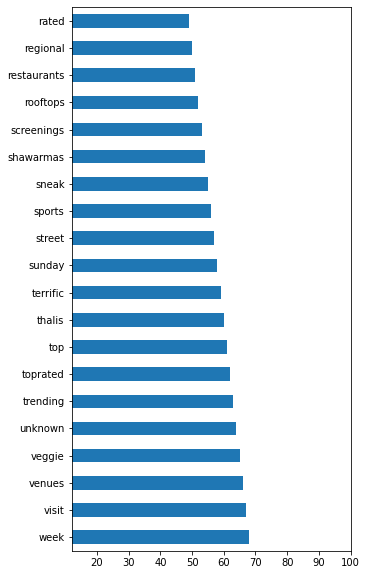

In [ ]:
top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind = "barh", figsize = (5,10), xlim = (12, 100))

In [ ]:
#Create an object of stemming function:
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
zomato_df['Collections'] = zomato_df['Collections'].apply(stemming)
zomato_df.head()

Cost                                        Collections  \
0   800.0  food hygien rate restaur hyderabad corpor favo...   
1   800.0                                  hyderabad hottest   
2  1300.0                     great buffet hyderabad hottest   
3   800.0                                 late night restaur   
4  1200.0  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1                     Biryani, North Indian, Chinese  
2       Asian, Mediterranean, North Indian, Desserts  
3  Biryani, North Indian, Chinese, Seafood, Bever...  
4  Asian, Continental, North Indian, Chinese, Med...

In [ ]:
#Create the object of tfid vectorizer:
tfid_vectorizer = TfidfVectorizer()

#Fit the vectorizer using the text data:
tfid_vectorizer.fit(zomato_df['Collections'])   

#Collect the vocabulary items used in the vectorizer:
dictionary = tfid_vectorizer.vocabulary_.items()

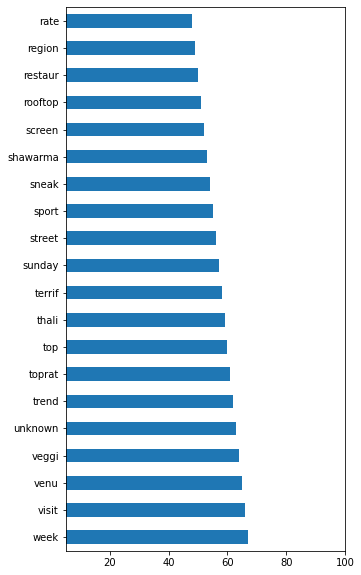

In [ ]:
#Lists to store the vocab and counts:
vocab = []
count = []
#Iterate through each vocab and count append the value to designated lists:
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
#Store the count in panadas dataframe with vocab as index:
vocab_after_stem = pd.Series(count, index=vocab)
#Sort the dataframe:
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
#Plot of the top vocab:
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5, 100))

In [ ]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
zomato_df['Collections_length'] = zomato_df['Collections'].apply(length)
zomato_df.head()

Cost                                        Collections  \
0   800.0  food hygien rate restaur hyderabad corpor favo...   
1   800.0                                  hyderabad hottest   
2  1300.0                     great buffet hyderabad hottest   
3   800.0                                 late night restaur   
4  1200.0  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collections_length  
0  Chinese, Continental, Kebab, European, South I...                  98  
1                     Biryani, North Indian, Chinese                  17  
2       Asian, Mediterranean, North Indian, Desserts                  30  
3  Biryani, North Indian, Chinese, Seafood, Bever...                  18  
4  Asian, Continental, North Indian, Chinese, Med...                  83

### **#Applying same steps for Cuisines:**

In [ ]:
#Remove punctuation:
zomato_df['Cuisines'] = zomato_df['Cuisines'].apply(remove_punctuation)

In [ ]:
#Remove stopwards:
zomato_df['Cuisines'] = zomato_df['Cuisines'].apply(stopwords)
zomato_df.head()

Cost                                        Collections  \
0   800.0  food hygien rate restaur hyderabad corpor favo...   
1   800.0                                  hyderabad hottest   
2  1300.0                     great buffet hyderabad hottest   
3   800.0                                 late night restaur   
4  1200.0  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collections_length  
0  chinese continental kebab european south india...                  98  
1                       biryani north indian chinese                  17  
2          asian mediterranean north indian desserts                  30  
3     biryani north indian chinese seafood beverages                  18  
4  asian continental north indian chinese mediter...                  83

In [ ]:
#Create a count vectorizer object:
count_vectorizer = CountVectorizer()

#Fit the count vectorizer using the text data:
count_vectorizer.fit(zomato_df['Cuisines'])

#Collect the vocabulary items used in the vectorizer:
dictionary_l = count_vectorizer.vocabulary_.items()

In [ ]:
#Lists to store the vocab and counts:
vocab = []
count = []

#Iterate through each vocab and count append the value to designated lists:
for key, value in dictionary_l:
    vocab.append(key)
    count.append(value)

#Store the count in panadas dataframe with vocab as index:
vocab_bef_stem = pd.Series(count, index=vocab)

#Sort the dataframe:
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
vocab_bef_stem

wraps            46
thai             45
sushi            44
street           43
spanish          42
south            41
seafood          40
salad            39
pizza            38
north            37
mughlai          36
momos            35
modern           34
mithai           33
mexican          32
mediterranean    31
malaysian        30
lebanese         29
kebab            28
juices           27
japanese         26
italian          25
indonesian       24
indian           23
ice              22
hyderabadi       21
healthy          20
goan             19
food             18
finger           17
fast             16
european         15
eastern          14
desserts         13
cream            12
continental      11
chinese          10
cafe              9
burger            8
biryani           7
beverages         6
bbq               5
bakery            4
asian             3
arabian           2
andhra            1
american          0
dtype: int64

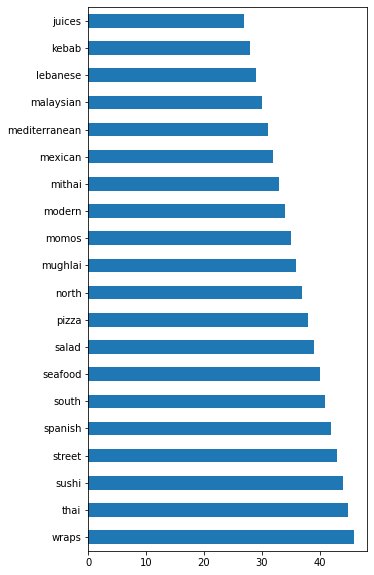

In [ ]:
#Plotting top words:

top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [ ]:
#Steamming:

zomato_df['Cuisines'] = zomato_df['Cuisines'].apply(stemming)
zomato_df.head()

Cost                                        Collections  \
0   800.0  food hygien rate restaur hyderabad corpor favo...   
1   800.0                                  hyderabad hottest   
2  1300.0                     great buffet hyderabad hottest   
3   800.0                                 late night restaur   
4  1200.0  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collections_length  
0  chines continent kebab european south indian n...                  98  
1                        biryani north indian chines                  17  
2           asian mediterranean north indian dessert                  30  
3        biryani north indian chines seafood beverag                  18  
4  asian continent north indian chines mediterranean                  83

In [ ]:
#Create the object of tfid vectorizer:
tfid_vectorizer = TfidfVectorizer()

#Fit the vectorizer using the text data:
tfid_vectorizer.fit(zomato_df['Cuisines'])

#Collect the vocabulary items used in the vectorizer:
dictionary_Cuisines = tfid_vectorizer.vocabulary_.items()

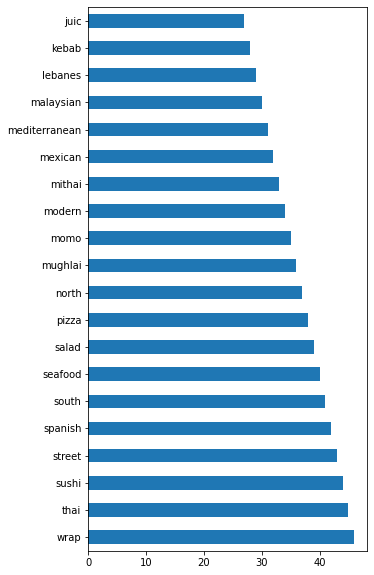

In [ ]:
#Lists to store the vocab and counts:
vocab = []
count = []

#Iterate through each vocab and count append the value to designated lists:
for key, value in dictionary_Cuisines:
    vocab.append(key)
    count.append(value)

# Store the count in panadas dataframe with vocab as index:
vocab_after_stem = pd.Series(count, index=vocab)

# Sort the dataframe:
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

# Plot of the top vocab:
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10))

In [ ]:
zomato_df['Cuisines_length'] = zomato_df['Cuisines'].apply(length)
zomato_df.head()

Cost                                        Collections  \
0   800.0  food hygien rate restaur hyderabad corpor favo...   
1   800.0                                  hyderabad hottest   
2  1300.0                     great buffet hyderabad hottest   
3   800.0                                 late night restaur   
4  1200.0  best bar pub food hygien rate restaur hyderaba...   

                                            Cuisines  Collections_length  \
0  chines continent kebab european south indian n...                  98   
1                        biryani north indian chines                  17   
2           asian mediterranean north indian dessert                  30   
3        biryani north indian chines seafood beverag                  18   
4  asian continent north indian chines mediterranean                  83   

   Cuisines_length  
0               57  
1               27  
2               40  
3               43  
4               49

In [ ]:
zomato_df[["Collections", "Cuisines"]]

Collections  \
0    food hygien rate restaur hyderabad corpor favo...   
1                                    hyderabad hottest   
2                       great buffet hyderabad hottest   
3                                   late night restaur   
4    best bar pub food hygien rate restaur hyderaba...   
..                                                 ...   
99                                             unknown   
100                                            unknown   
101                                            unknown   
103                                            unknown   
104                                  panasian delicaci   

                                              Cuisines  
0    chines continent kebab european south indian n...  
1                          biryani north indian chines  
2             asian mediterranean north indian dessert  
3          biryani north indian chines seafood beverag  
4    asian continent north indian chines mediterranean  
..                                                 ...  
99                                      chines seafood  
100                                    fast food salad  
101                                      bakeri mithai  
103                                          fast food  
104                        thai asian chines malaysian  

[103 rows x 2 columns]

### **#Applying Silhouetee Score Method:**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

X_features_rec_mon = zomato_df[["Collections_length", "Cuisines_length"]]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.46991586950193437
For n_clusters = 3, silhouette score is 0.46702897343634764
For n_clusters = 4, silhouette score is 0.4722959202437076
For n_clusters = 5, silhouette score is 0.4323522358129114
For n_clusters = 6, silhouette score is 0.4613927578809529
For n_clusters = 7, silhouette score is 0.46487148663082484
For n_clusters = 8, silhouette score is 0.45083262716218847


Silhouette score is used to ***evaluate the quality of clusters created using clustering algorithms such as K-Means*** in terms of how well samples are clustered with other samples that are similar to each other. The ***Silhouette score is calculated for each sample of different clusters***. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a **mean intra-cluster distance**. The mean distance is denoted by a.

Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a ***mean nearest-cluster distance***. The mean distance is denoted by b.

For n_clusters = 2 The average silhouette_score is : 0.46991586950193437
For n_clusters = 3 The average silhouette_score is : 0.4667529314412326
For n_clusters = 4 The average silhouette_score is : 0.4722959202437076
For n_clusters = 5 The average silhouette_score is : 0.4450753343183054
For n_clusters = 6 The average silhouette_score is : 0.4613927578809529
For n_clusters = 7 The average silhouette_score is : 0.4679349744084311
For n_clusters = 8 The average silhouette_score is : 0.44868002719560973


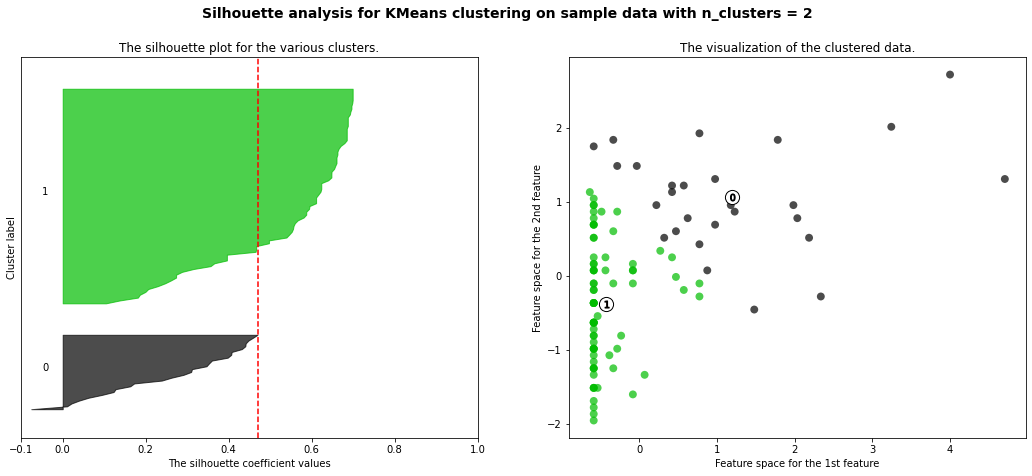

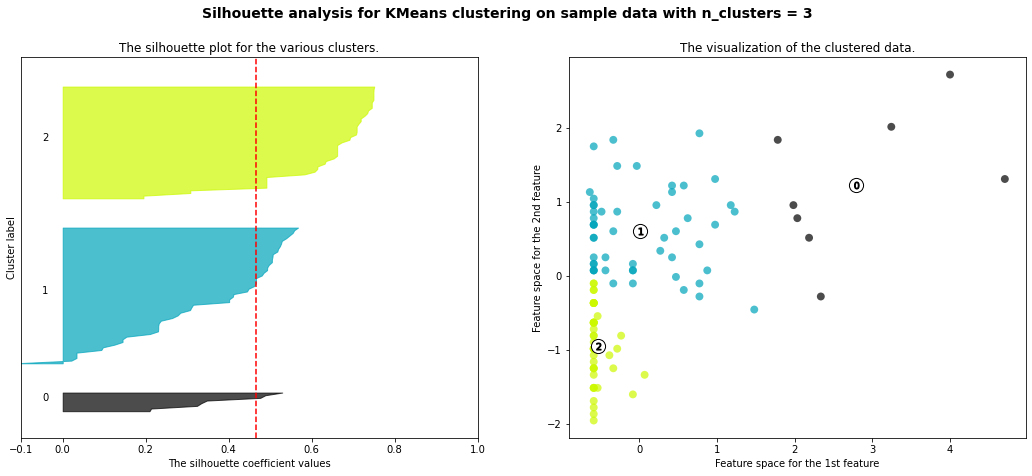

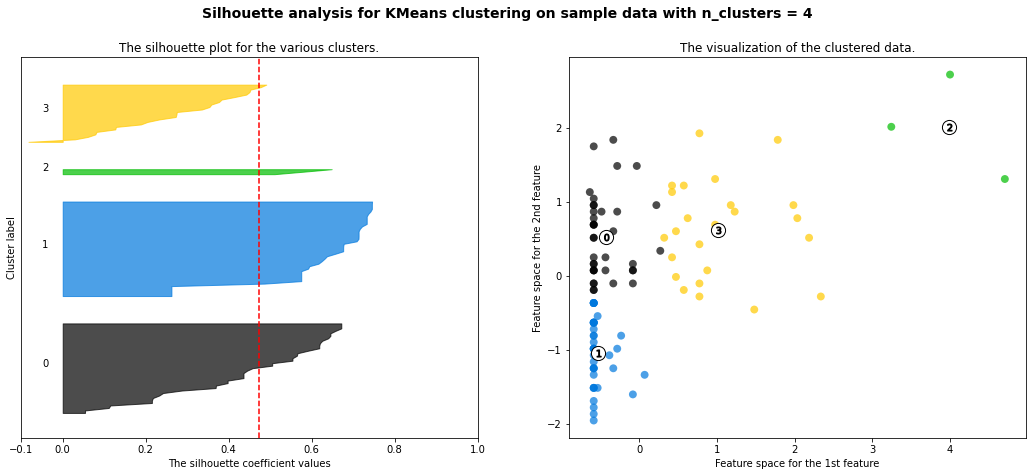

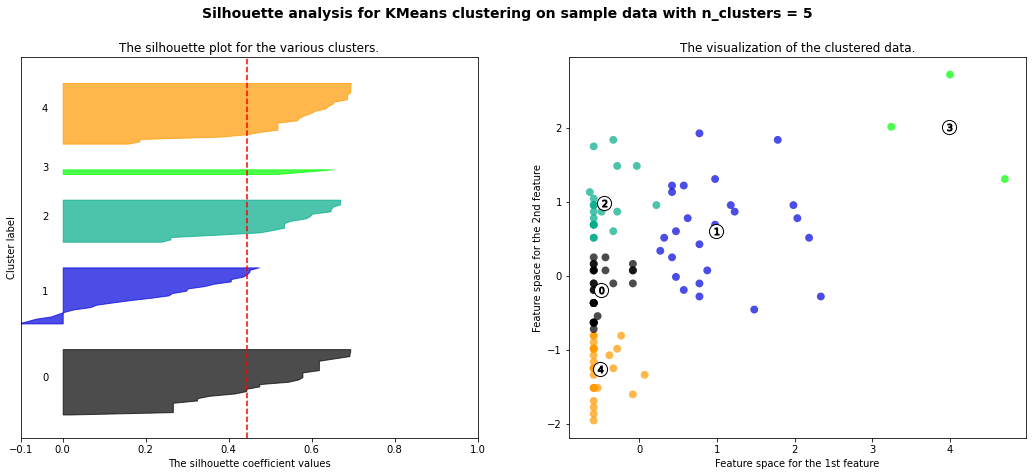

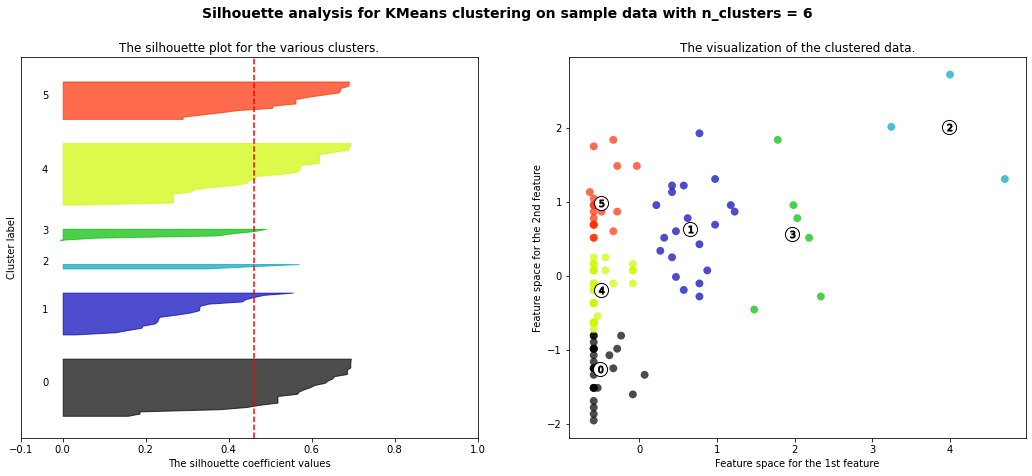

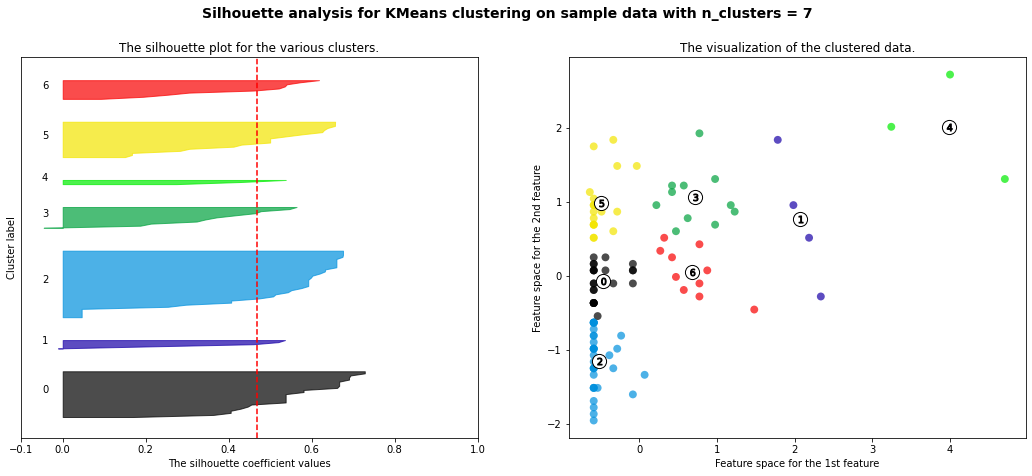

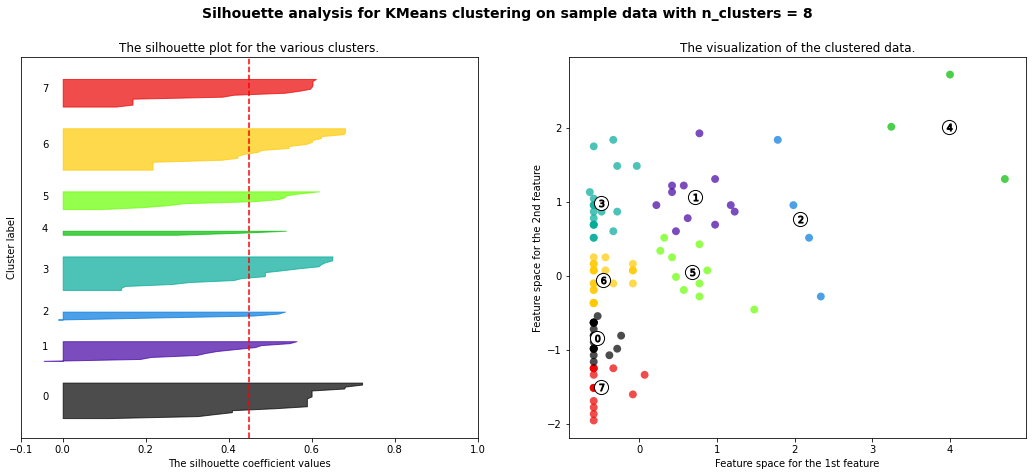

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=250, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## **#K Mean Clustering:**

Applying Elbow Method:

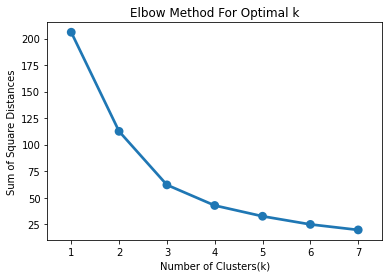

In [ ]:
X_features_rec_mon=zomato_df[["Collections_length", "Cuisines_length"]]
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,8):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

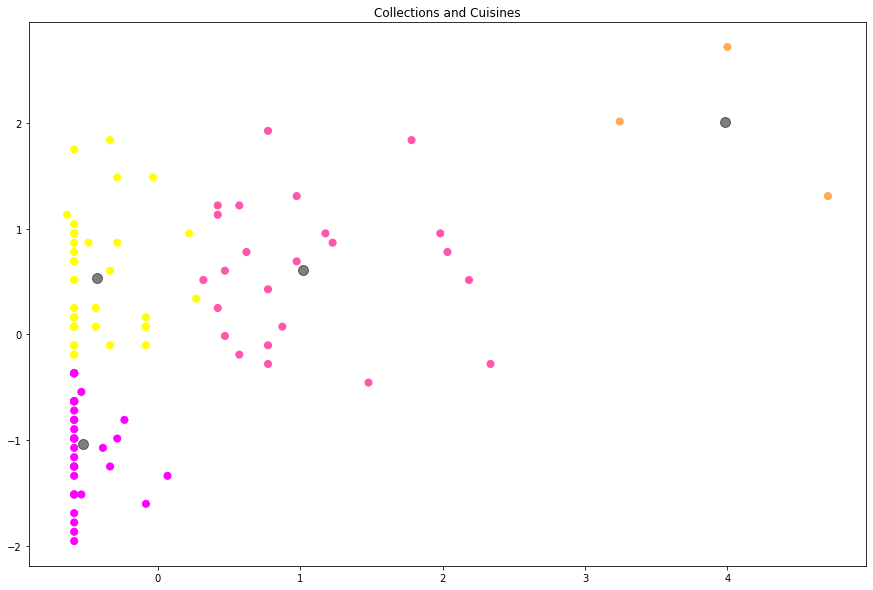

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Collections and Cuisines')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

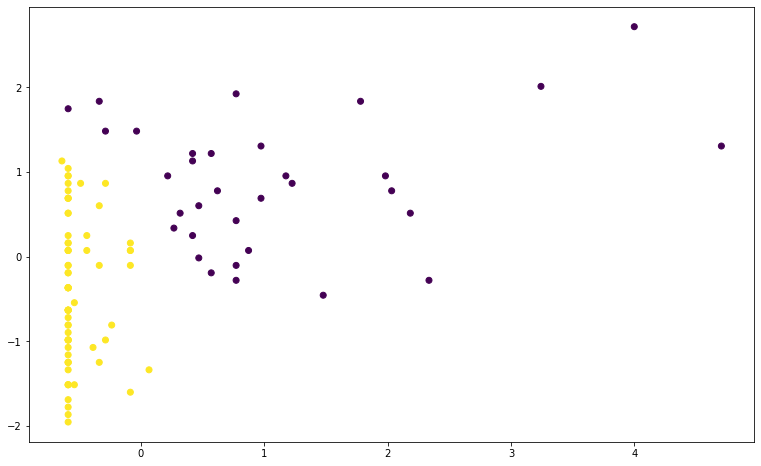

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

### **#Dendrogram to find optimal number of cluster:**

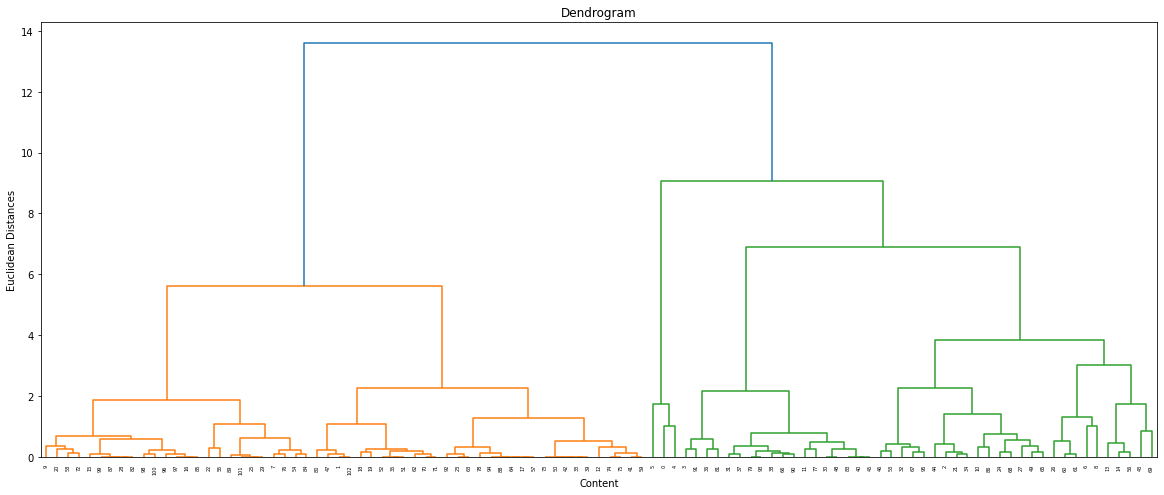

In [ ]:
#Using the dendogram to find the optimal number of clusters:

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()              #Find largest vertical distance we can make without crossing any other horizontal line

### **#Agglomerative hierarchical Clustering:**

In [ ]:
# Fitting hierarchical clustering to the dataset:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

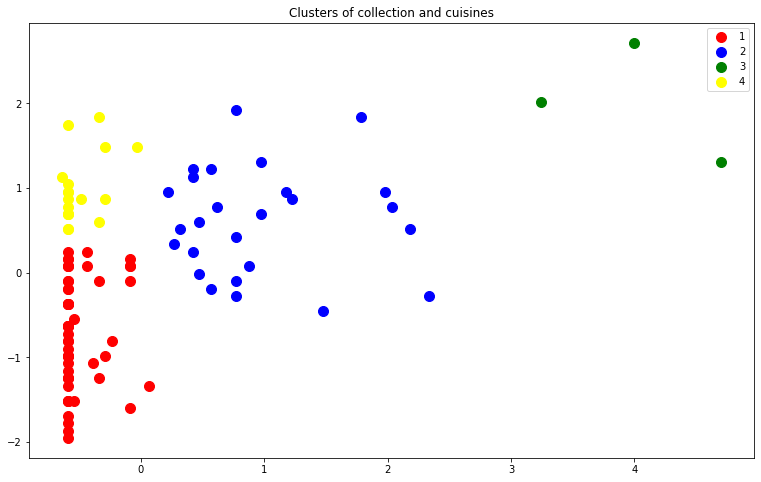

In [ ]:
# Visualizing the clusters (three dimensions only):

plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'yellow', label = '4')

plt.title('Clusters of collection and cuisines')

plt.legend()
plt.show()



*   ***By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 4.***







### **#Sentiment Analysis:**



*   Sentiment Analysis is the process of computationally determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.




## **#Zomato Restaurant reviews:**

**Merge this dataset with Names and Matadata and then use for sentiment analysis part:**

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
sentiment_df = pd.read_csv("/content/drive/MyDrive/4. Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant reviews.csv")


In [ ]:
sentiment_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [ ]:
sentiment_df.tail()


Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6

In [ ]:
sentiment_df.shape

(10000, 7)

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [ ]:
#Finding the column that have null values:

null_values = pd.DataFrame({'Null_Values' : sentiment_df.isna().sum(), 'Percentage_Null_Values' : round((sentiment_df.isna().sum()) / (sentiment_df.shape[0]) * (100),2)})
null_values

Null_Values  Percentage_Null_Values
Restaurant            0                    0.00
Reviewer             38                    0.38
Review               45                    0.45
Rating               38                    0.38
Metadata             38                    0.38
Time                 38                    0.38
Pictures              0                    0.00

In [ ]:
#Drop unnecessary coulmn:
sentiment_df.drop(['Pictures','Time', 'Metadata', 'Reviewer', 'Restaurant'],axis= 1,inplace= True)     

In [ ]:
sentiment_df = sentiment_df.dropna(how = 'any')

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  9955 non-null   object
 1   Rating  9955 non-null   object
dtypes: object(2)
memory usage: 233.3+ KB


In [ ]:
sentiment_df.describe()

Review Rating
count    9955   9955
unique   9364     10
top      good      5
freq      237   3826

In [ ]:
sentiment_df.Rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
sentiment_df[(sentiment_df.Rating == 'Like')].index

Int64Index([7601], dtype='int64')

In [ ]:
sentiment_df = sentiment_df.drop(7601)

In [ ]:
#Converting object data type of rating column to float:

rating = sentiment_df.Rating.to_list()

In [ ]:
for i in range(0, len(rating)):
  rating[i] = float(rating[i])

In [ ]:
sentiment_df['rating'] = rating

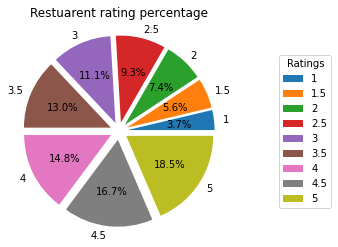

In [ ]:
y = np.unique(rating)
mylabels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
plt.pie(y, labels = mylabels, autopct = '%1.1f%%', explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.legend(title = 'Ratings',bbox_to_anchor = (1.5,0.5), loc = "right")
plt.title("Restuarent rating percentage")
plt.show()

In [ ]:
pd.cut(sentiment_df["rating"], bins = 3).value_counts(sort = False)

(0.996, 2.333]    2428
(2.333, 3.667]    1258
(3.667, 5.0]      6268
Name: rating, dtype: int64

In [ ]:
labels = ["bad", "average", "good"]
sentiment_df["rating_"]  = pd.cut(sentiment_df["rating"], bins = 3, labels = labels)
print(sentiment_df.head())

                                              Review Rating  rating rating_
0  The ambience was good, food was quite good . h...      5     5.0    good
1  Ambience is too good for a pleasant evening. S...      5     5.0    good
2  A must try.. great food great ambience. Thnx f...      5     5.0    good
3  Soumen das and Arun was a great guy. Only beca...      5     5.0    good
4  Food is good.we ordered Kodi drumsticks and ba...      5     5.0    good


In [ ]:
sentiment_df = sentiment_df.drop(["Rating"], axis =1)

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [ ]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
sentiment_df.Review = sentiment_df.Review.apply(lemmatize_words)

In [ ]:
x = sentiment_df["Review"]
y = sentiment_df["rating_"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 , random_state = 0)

print("x_train:" , len(x_train))
print("x_test:" , len(x_test))
print("y_train:" , len(y_train))
print("y_test:" , len(y_test))

x_train: 7465
x_test: 2489
y_train: 7465
y_test: 2489


In [ ]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver="lbfgs")

In [ ]:
!pip install pipeline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([("vectorizer", tvec), ("classifier", clf2)])
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
from sklearn.metrics import confusion_matrix
predictions =  model.predict(x_test)
confusion_matrix(predictions, y_test)

array([[  53,   22,   27],
       [  69,  509,   28],
       [ 195,  101, 1485]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy :", accuracy_score(predictions, y_test))
print("Precision :", precision_score(predictions, y_test, average = "weighted"))
print("Recall :", recall_score(predictions, y_test, average = "weighted"))

Accuracy : 0.8224186420249096
Precision : 0.8929315433850494
Recall : 0.8224186420249096


In [ ]:
#Taking example to understand above model:
example = ["The ambience was good, food was quite good "]
result = model.predict(example)
print(result)

['good']


In [ ]:
#Createing new rating column categorised into 3 types i.e. good, bad and average:
def sentiment_rating(rating):

  #Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good) and 2.5, 3, 3.5 with 0.5 (average):
  if(rating == 1 or rating == 1.5 or rating == 2):
    bad = 0
    return bad
  elif(rating == 2.5 or rating == 3 or rating == 3.5):
    average = 0.5
    return average
  elif(rating == 4 or rating == 4.5 or rating == 5):
    good = 1
    return good

#Applying above function:
sentiment_df["rating_0_0.5_1"] = sentiment_df["rating"].apply(sentiment_rating)

#Drop rating column:
sentiment_df = sentiment_df.drop(["rating"], axis =1)

In [ ]:
X = sentiment_df["Review"]
Y = sentiment_df["rating_0_0.5_1"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25 , random_state = 0)

print("x_train:" , len(X_train))
print("x_test:" , len(X_test))
print("y_train:" , len(Y_train))
print("y_test:" , len(Y_test))

x_train: 7465
x_test: 2489
y_train: 7465
y_test: 2489


In [ ]:
good = X_train[Y_train[Y_train == 1.0].index]
bad = X_train[Y_train[Y_train == 0.0].index]
average = X_train[Y_train[Y_train == 0.5].index]

In [ ]:
X_train.shape, good.shape, bad.shape, average.shape

((7465,), (4728,), (1796,), (941,))

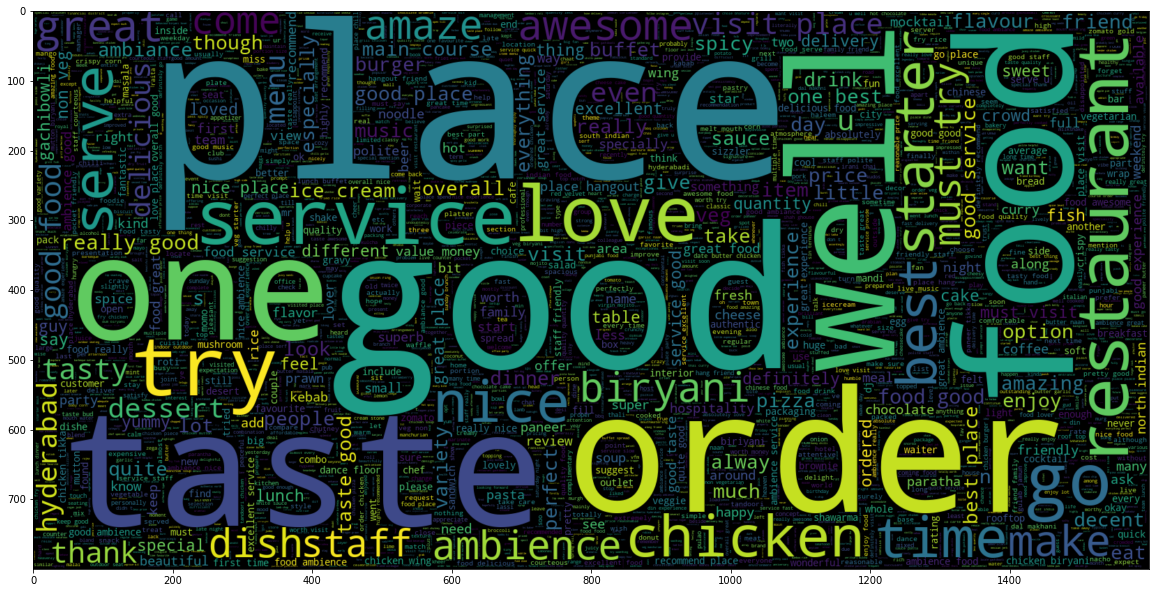

In [ ]:
#Text Reviews with good Ratings:

plt.figure(figsize = (20,20)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(good))
plt.imshow(wc,interpolation = 'bilinear')

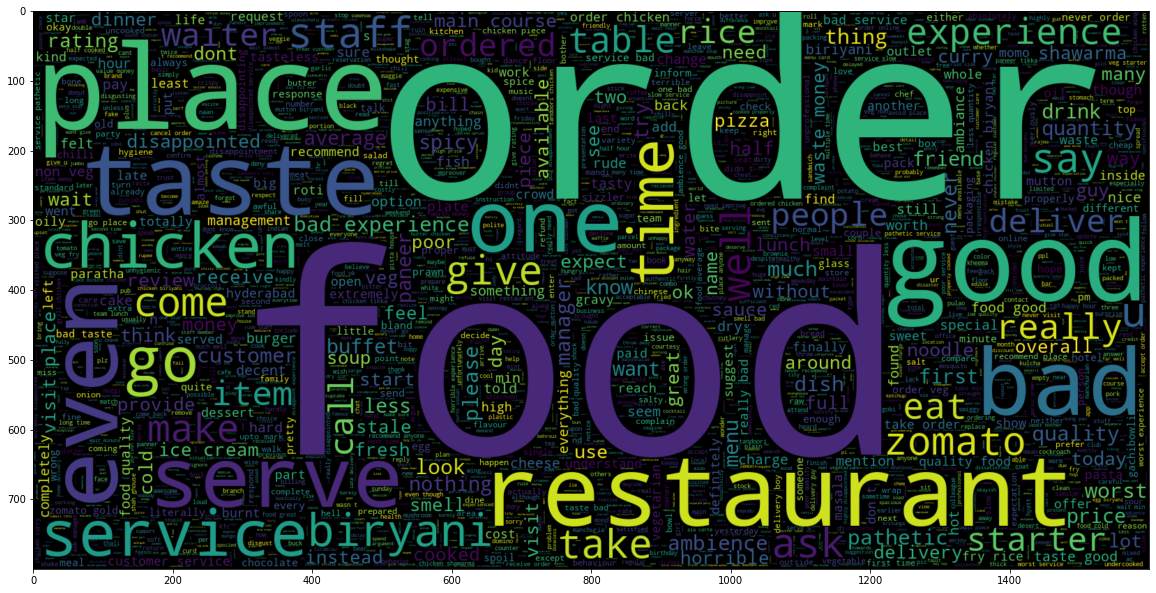

In [ ]:
#Text Reviews with poor Ratings:

plt.figure(figsize = (20,20)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(bad))
plt.imshow(wc,interpolation = 'bilinear')

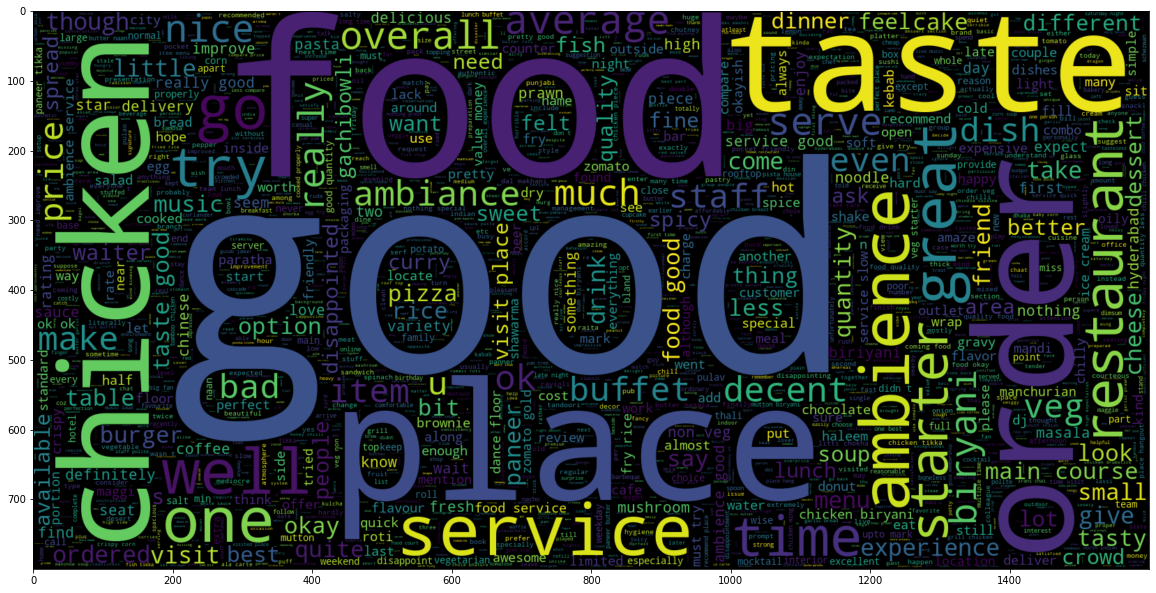

In [ ]:
#Text Reviews with average Ratings:
plt.figure(figsize = (20,20)) 
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(average))
plt.imshow(wc,interpolation = 'bilinear')

## **#Conclusion : Clustering Analysis:**

1) **Top 5 cuisines:**

i)North Indian, Chinese 

ii)North Indian 

iii)Continental

iv)Ice Cream, Desserts 

v)Fast Food


2) **Bottom 5 cuicines:**

i) American, Fast Food, Salad, Burger

ii)Continental, Italian, North Indian, Chinese 

iii)North Indian, Italian, Continental, Asian 

iv)Mexican, Italian, North Indian, Chinese, Salad

v)Momos


3) **Top 5 collections:**

i) Unknown 

ii)Food Hygiene Rated Restaurants in Hyderabad

iii)Great Buffets 

iv)Trending This Week 

v)Hyderabad's Hottest


4) **Bottom 5 collections:**

i)Sneak Peek Hyderabad 

ii)Best Milkshakes

iii)Happy Hours, Top-Rated, Gold Curated

iv)Best Bakeries

v)Great Breakfasts, Late Night Restaurants


5) **In collection top 3 vocab used is week, visit and veggi.**

6) **In cuisines top 3 vocab used is wrap, thai and sushi.**


7) **For n_clusters = 4, we get highest silhouette score is 0.4722959202437076.**

8) **From elbow method we get 4 number of cluster is best among all.**

9) **Used dendogram to find optimal numer of cluster**

10) **Applied agglomerative hierarchical clustering from this we fing 4 number of cluster good fit our model.**

11) **By applying different clustering algorithem to our dataset. we get the optimal number of cluster is equal to 4.**


## #**Conclusion : Sentiment Analysis:**

1) **We have categorize rating in 3 types i.e. good, bad and average. 4500+ good, 1700+ bad and 900+ average ratigs given by customer.**

2) **We have applied logistic regression on reviews dataset. getting 82% Accuracy on model.**